#Stock Market Prediction and Forecasting using stacked LSTM

##Importing the datasets
###Numeric Python - numpy helps us to manage high-level mathematical calculations.
###Pandas - It helps us to ingest the dataset from local directory or web based files via link, manipulate the dataset as per the user requirements.

In [36]:
import pandas as pd

In [37]:
import numpy as np

Epoch 1/80
10/10 [==============================] - 10s 340ms/step - loss: 0.0686 - val_loss: 0.0093
Epoch 2/80
10/10 [==============================] - 2s 200ms/step - loss: 0.0128 - val_loss: 0.0013
Epoch 3/80
10/10 [==============================] - 2s 204ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 4/80
10/10 [==============================] - 2s 219ms/step - loss: 0.0043 - val_loss: 9.3009e-04
Epoch 5/80
10/10 [==============================] - 3s 311ms/step - loss: 0.0034 - val_loss: 9.1967e-04
Epoch 6/80
10/10 [==============================] - 2s 202ms/step - loss: 0.0031 - val_loss: 8.7616e-04
Epoch 7/80
10/10 [==============================] - 2s 207ms/step - loss: 0.0029 - val_loss: 8.2229e-04
Epoch 8/80
10/10 [==============================] - 2s 204ms/step - loss: 0.0028 - val_loss: 8.1650e-04
Epoch 9/80
10/10 [==============================] - 2s 201ms/step - loss: 0.0028 - val_loss: 8.4146e-04
Epoch 10/80
10/10 [==============================] - 2s 249ms/step - loss: 

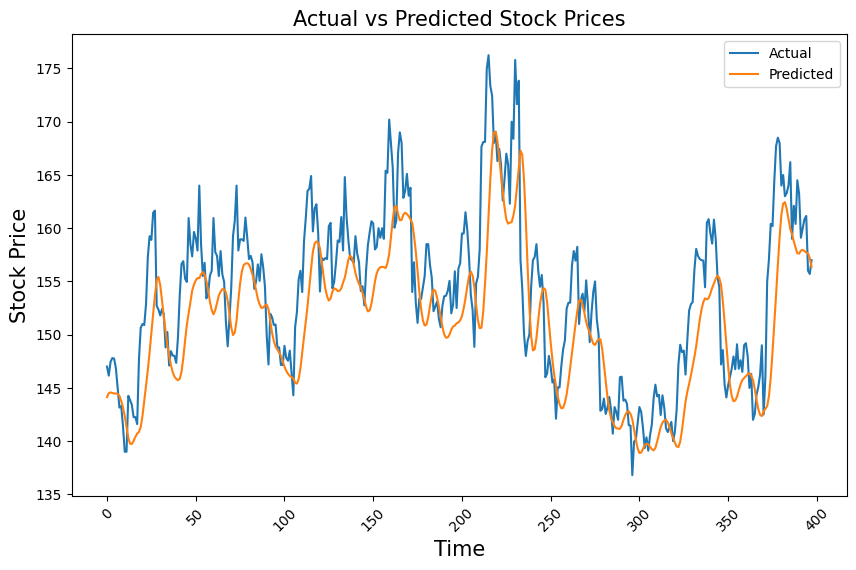

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Read the data from the CSV file
dataset = pd.read_csv('../content/NSE-TATAGLOBAL11.csv')
df_1 = dataset.reset_index()['Open']  # Use 'Open' column for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1, 1))

# Define the time step for sequences
time_steps = 100

# Prepare sequences
sequences = []
for i in range(len(df_1) - time_steps):
    sequences.append(df_1[i:i+time_steps+1])

sequences = np.array(sequences)

# Split the data into training and testing sets
training_size = int(0.65 * len(sequences))
train_data = sequences[:training_size, :]
test_data = sequences[training_size:, :]

train_X = train_data[:, :-1]
train_y = train_data[:, -1]
test_X = test_data[:, :-1]
test_y = test_data[:, -1]

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_y, epochs=80, batch_size=64, validation_split=0.2, verbose=1)

# Make predictions on the test set
test_predicted = model.predict(test_X)

# Inverse transform the predictions
test_inverse_predicted = scaler.inverse_transform(test_predicted)

# Plot the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(test_y.reshape(-1, 1)), label='Actual')
plt.plot(test_inverse_predicted, label='Predicted')
plt.xticks(rotation=45)
plt.xlabel('Time', size=15)
plt.ylabel('Stock Price', size=15)
plt.title('Actual vs Predicted Stock Prices', size=15)
plt.legend()
plt.show()
